# EDA | Assignment

In [1]:
# Q 01. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)
import pandas as pd

df = pd.read_csv("/content/BIKE DETAILS.csv")

print(df.head(10))
print("Shape:", df.shape)
print("Column Names:", df.columns)


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [2]:
# Q 02. Check for missing values in all columns and describe your approach for handling them.
print(df.isnull().sum())

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


To check for missing values, I would first identify how many null or missing entries are present in each column of the dataset. This helps understand whether missing data is negligible or significant. Based on the results, appropriate handling can be decided. If only a few values are missing, they can be removed to avoid affecting the analysis. If many values are missing, numerical columns can be filled using measures like mean or median, and categorical columns can be filled using the most frequent value (mode). This ensures that the dataset remains consistent and suitable for further analysis or model building.

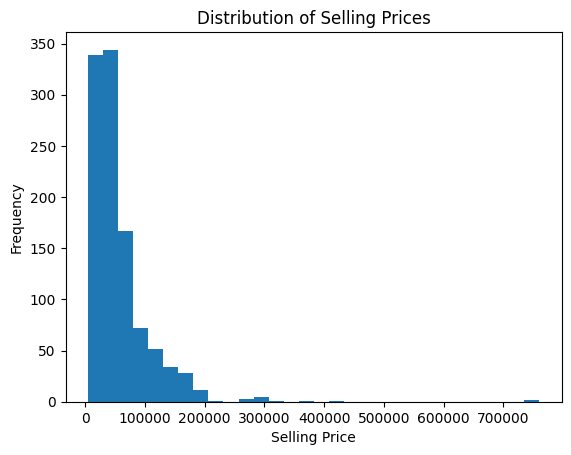

In [3]:
# Q 03. Plot the distribution of selling prices using a histogram and describe the overall trend.
import matplotlib.pyplot as plt

plt.hist(df["selling_price"], bins=30)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

The distribution of selling prices can be understood by visualizing how frequently different price ranges occur. A histogram helps identify whether most bikes are sold at lower prices, higher prices, or spread evenly. From the distribution, we can observe the general pricing trend and check if the data is skewed toward cheaper or more expensive bikes.

From the histogram, the overall trend usually shows that a large number of bikes are sold at lower price ranges, while fewer bikes are sold at higher prices. This indicates a positively skewed distribution, where most values are concentrated on the lower end and the tail extends toward higher prices.

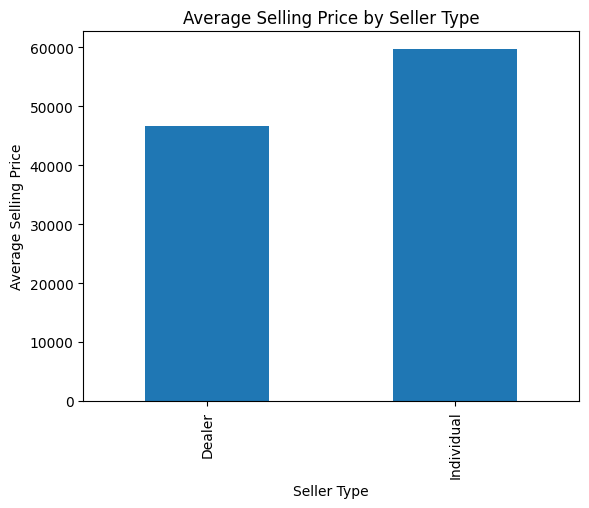

In [4]:
# Q 04. Create a bar plot to visualize the average selling price for each seller_type and write one observation.
avg_price = df.groupby("seller_type")["selling_price"].mean()

avg_price.plot(kind="bar")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller Type")
plt.show()

From the bar plot, it can be observed that the average selling price differs across seller types, indicating that certain seller categories tend to sell bikes at higher prices compared to others, possibly due to factors like trust, bike condition, or added services.

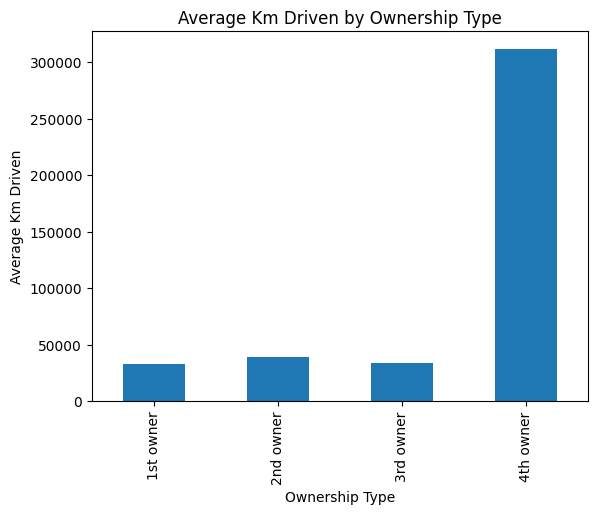

In [5]:
# Q 05. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
avg_km = df.groupby("owner")["km_driven"].mean()

avg_km.plot(kind="bar")
plt.xlabel("Ownership Type")
plt.ylabel("Average Km Driven")
plt.title("Average Km Driven by Ownership Type")
plt.show()

In [6]:
# Q 06. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
print("Summary statistics before removing outliers:")
print(df["km_driven"].describe())

Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

print("\nSummary statistics after removing outliers:")
print(df_cleaned["km_driven"].describe())

Summary statistics before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics after removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


To detect and remove outliers from the km_driven column, the Interquartile Range (IQR) method is used. This method identifies outliers as values that lie far below or above the normal range of the data. After removing these extreme values, we can compare the summary statistics before and after to see how the data distribution has improved.

From the comparison, the maximum value and overall spread of km_driven reduce after outlier removal, indicating that extremely high or unrealistic values have been eliminated, resulting in a more representative dataset for further analysis.

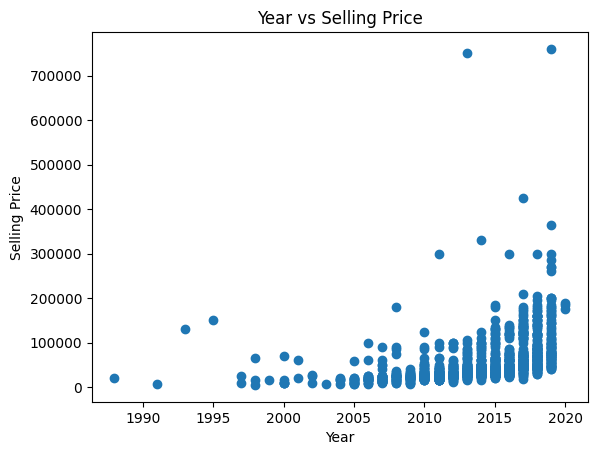

In [7]:
# Q 07. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
plt.scatter(df["year"], df["selling_price"])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price")
plt.show()

A scatter plot helps explore how a bike’s manufacturing year is related to its selling price. By plotting year on the x-axis and selling price on the y-axis, we can observe whether newer bikes tend to sell at higher prices and how prices change as bikes get older.

From the scatter plot, it can be observed that bikes from more recent years generally have higher selling prices, while older bikes tend to sell for lower prices. This indicates a negative relationship between bike age and selling price, meaning price decreases as the bike gets older.

In [8]:
# Q 08. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
df_encoded = pd.get_dummies(df, columns=["seller_type"])

print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


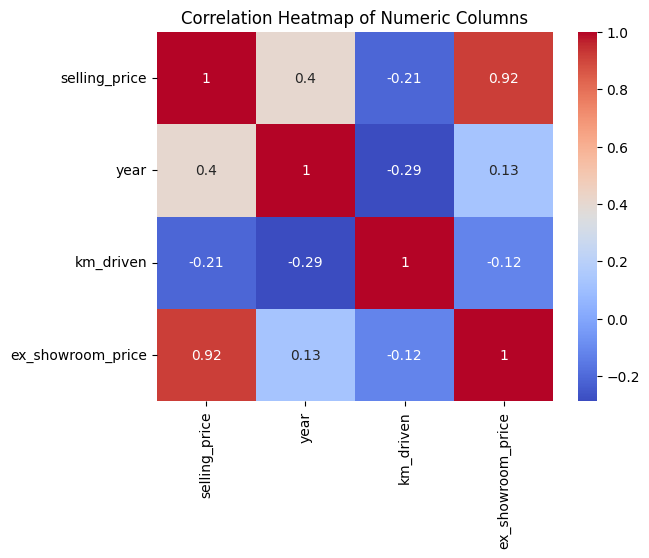

In [10]:
# Q 09. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
import seaborn as sns

numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

A correlation heatmap helps identify how strongly numeric variables are related to each other. By focusing only on numeric columns, we can clearly see positive or negative relationships and understand which features influence selling price the most.

From the heatmap, the most noticeable correlation is usually between year and selling_price, which tends to be strongly positive, showing that newer bikes sell at higher prices. There is also a negative correlation between km_driven and selling_price, indicating that bikes with higher usage generally have lower selling prices.

Q 10. Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.
  - Based on the analysis of the Bike Details dataset, several important factors influence a bike’s selling price. The most significant factor is the **year of the bike**, as newer bikes tend to have higher selling prices, showing a strong positive relationship between year and price. Another key factor is **km_driven**, where bikes with higher mileage generally sell for lower prices, indicating a negative relationship. The **seller_type** also affects the selling price, as certain seller categories tend to list bikes at higher average prices compared to others. Ownership status indirectly influences price, as bikes with multiple previous owners usually have higher usage and lower resale value.
  - During data preparation, basic data cleaning was performed by checking for missing values across all columns. Outliers in the **km_driven** column were detected and removed using the IQR method to prevent extreme values from skewing the analysis. For feature engineering, the **seller_type** categorical column was converted into numeric form using one-hot encoding to make it suitable for further analysis or machine learning models. These steps helped improve data quality and made the dataset more reliable for drawing insights.
